## Visualization of filters

In this notebook, we want to visualize the trained filters of the model

In [12]:
%matplotlib inline
from keras.models import load_model

channels = ['AF3', 'F7', 'F3', 'FC5', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'FC6', 'F4', 'F8', 'AF4', 'STI 014']

model = load_model("models/model.h5")



In [13]:
model.layers

In [20]:
weights, biases = model.layers[0].get_weights()

weights.shape

(14, 1, 1, 10)

In [42]:
model.layers[1].get_weights()[0].shape

(1, 13, 10, 50)

Let's plot the filters as a colour map

In [38]:
plt.imshow?

In [39]:
weights[:,:,:].shape

(14, 1, 1, 10)

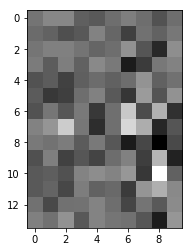

In [37]:
import matplotlib.pyplot as plt
import numpy as np

ax = plt.imshow(weights[:,:,:].reshape(14,-1), cmap=plt.cm.gray_r)

